# Advance Loan Prediction System

## Introduction

The company seeks **to automate (in real time) the loan qualifying procedure** based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in **accelerating decision-making process** for determining whether an applicant is eligible for a loan or not.

---

### Objectives of Notebook
**This notebook aims to:**
*   Analyze customer data provided in data set (EDA)
*   Build various ML models that can predict loan approval

**The machine learning models used in this project are:**
1. Logistic Regression
2. K-Nearest Neighbour (KNN)
3. Support Vector Machine (SVM)
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boost

---

### Data Set Description
 There are **13 variables** in this data set:
*   **8 categorical** variables,
*   **4 continuous** variables, and
*   **1** variable to accommodate the loan ID.


###Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Dataset Loading

In [2]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset

path='/content/drive/MyDrive/Advance Loan ML Project/dataset.csv'
loan_dataset = pd.read_csv(path)

In [4]:
type(loan_dataset) #type of dataset

pandas.core.frame.DataFrame

### Dataset First View

In [5]:
# Dataset First Look
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
loan_dataset.shape

(614, 13)

### Dataset Information

In [7]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Dataset description
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

loan_dataset.duplicated().sum()
loan_dataset.drop_duplicates(inplace=True) #at this point looks like doesn't have duplicate values

#### Missing Values/Null Values

In [10]:
# Missing values of dataset
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Removing the null values from dataset

loan_dataset = loan_dataset.dropna()
loan_dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
# Label encoding means replacing categorical values with numerical labels, typically integers starting from 0 or 1.
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}}).inplace=True

In [50]:
# Checking whether label is done or not
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [14]:
#Find the Dependent column values because it helps for giving loan
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [15]:
# We would like to categorize individuals separately if they have more than 3 dependents, to facilitate prediction during analysis.
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [16]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

## Data Visualisation

<Axes: xlabel='Education', ylabel='count'>

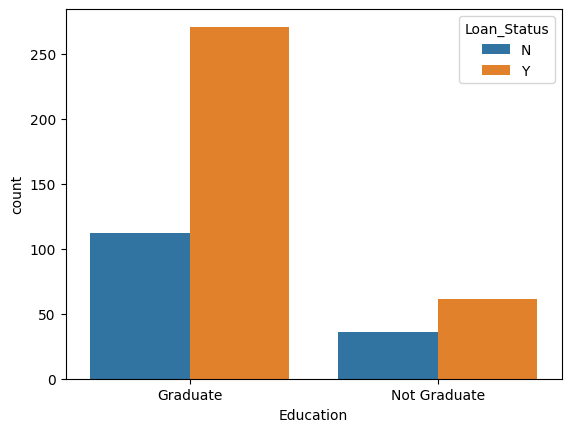

In [17]:
# Education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

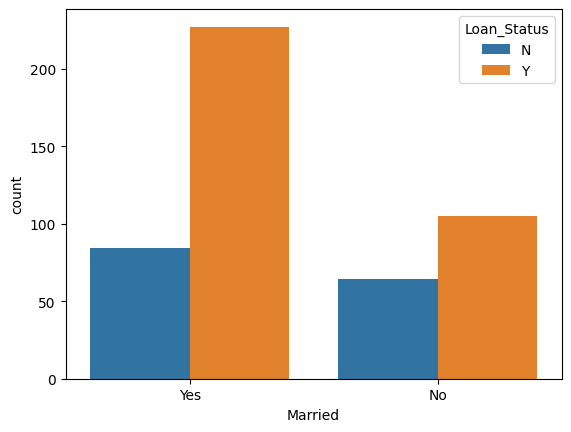

In [18]:
# Marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

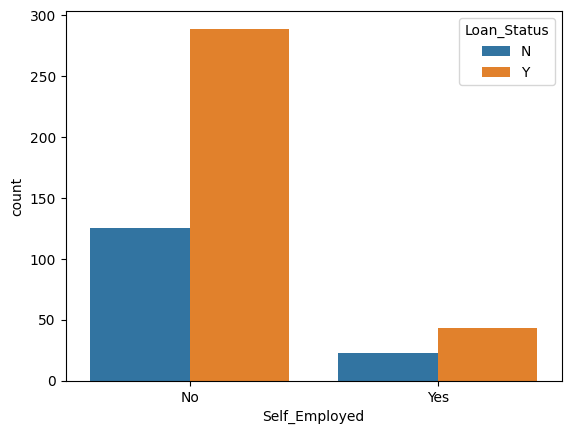

In [19]:
# Employement Status & Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Credit_History', ylabel='count'>

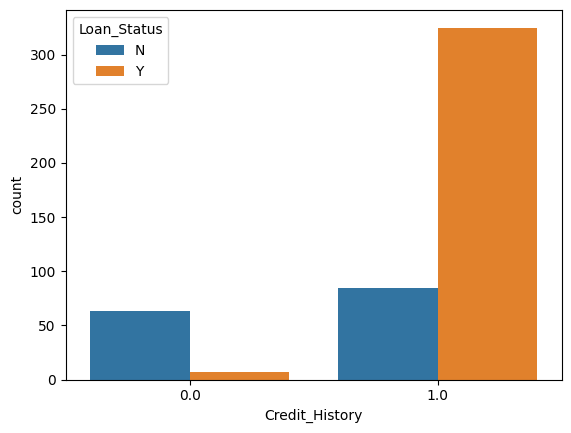

In [20]:
# Income Status & Loan Status
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan_dataset)

array([[<Axes: xlabel='ApplicantIncome', ylabel='ApplicantIncome'>,
        <Axes: xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>],
       [<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>,
        <Axes: xlabel='CoapplicantIncome', ylabel='CoapplicantIncome'>]],
      dtype=object)

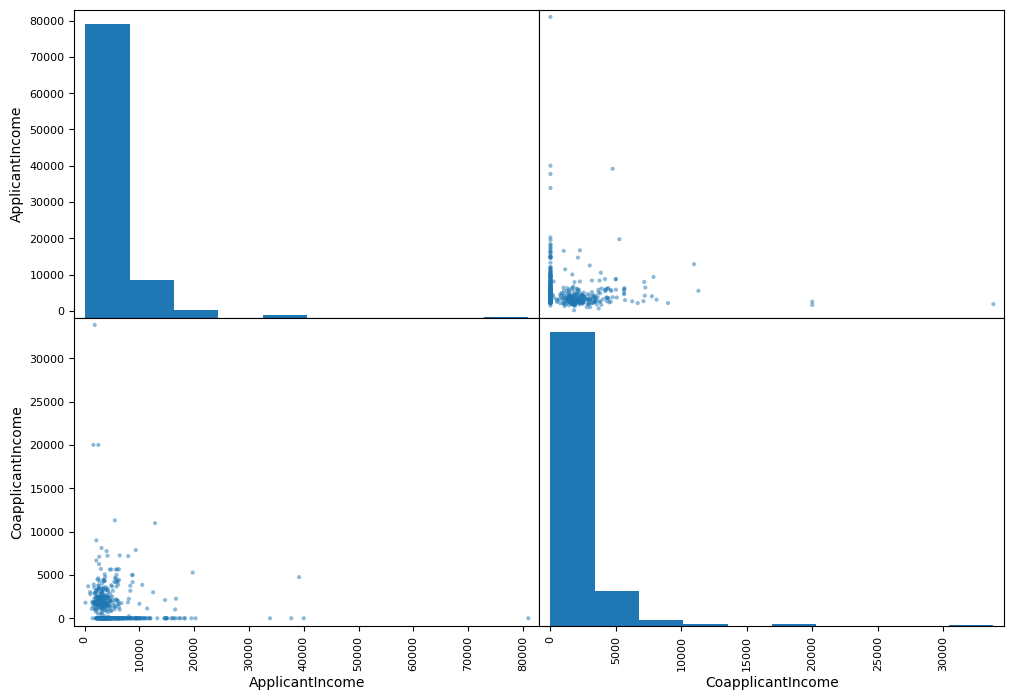

In [21]:
from pandas.plotting import scatter_matrix

# Define the attributes for correlation analysis
attributes = ['ApplicantIncome', 'CoapplicantIncome', 'Self_Employed']

# Create scatter matrix for analyzing correlations between attributes
scatter_matrix(loan_dataset[attributes], figsize=(12, 8))

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

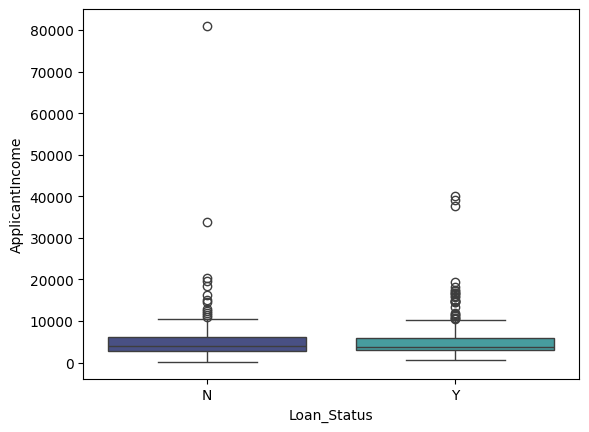

In [22]:
#Boxplot for Loan status and applicant income.

sns.boxplot(x="Loan_Status", y="ApplicantIncome",hue='Loan_Status', data=loan_dataset, palette="mako")

<Axes: xlabel='CoapplicantIncome', ylabel='Loan_Status'>

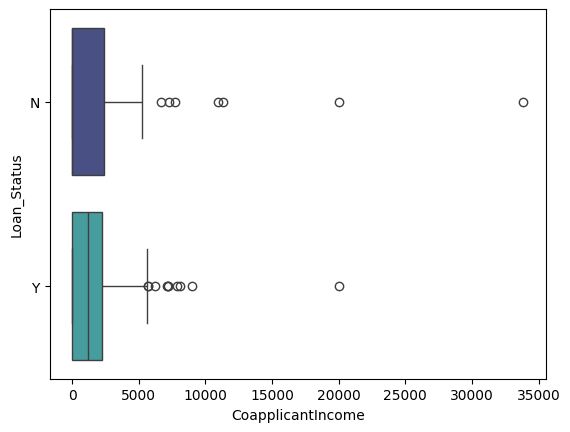

In [23]:
#Boxplot for Loan status and coapplicant income.
sns.boxplot(x="CoapplicantIncome", y="Loan_Status",hue='Loan_Status', data=loan_dataset, palette="mako")

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

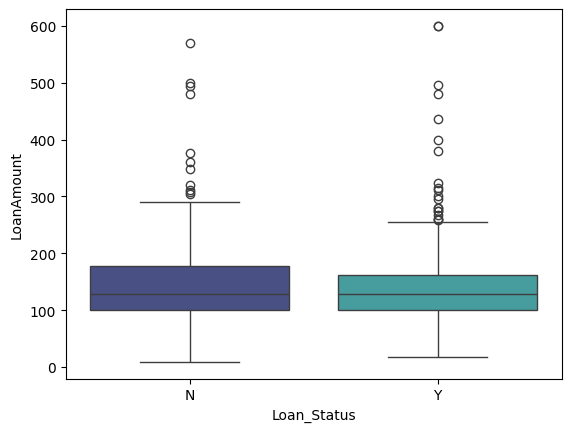

In [24]:
#Boxplot for Loan status and loan amount.

sns.boxplot(x="Loan_Status", y="LoanAmount",hue='Loan_Status', data=loan_dataset, palette="mako")

In [25]:
# Convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [26]:
loan_dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,Y
7,LP001014,1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1,N
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,Y
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,N
10,LP001024,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,2,Y


In [27]:
# Drop the 'Loan_ID' column from the loan dataset as it is not required for analysis
loan_dataset = loan_dataset.drop(['Loan_ID'], axis=1)

In [28]:
# Separating the data and label
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [29]:
# Print the data and labels
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

###Heatmap


<Axes: >

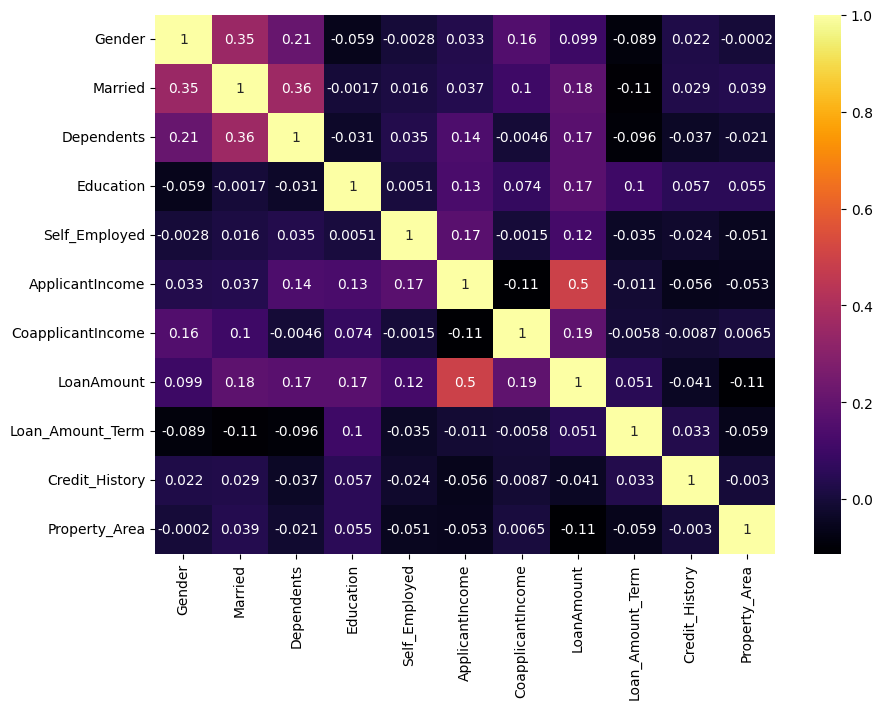

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(), annot=True, cmap='inferno')

## Train and Test the data

In [31]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [32]:
# Printing the data
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


## Training the Model

#### Here we use differenrt machine learning models for traing.

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train,Y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,Y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        30
           Y       0.69      1.00      0.81        66

    accuracy                           0.69        96
   macro avg       0.34      0.50      0.41        96
weighted avg       0.47      0.69      0.56        96

[[ 0 30]
 [ 0 66]]
LR accuracy: 68.75%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

#### K-Nearest Neighbour (KNN)

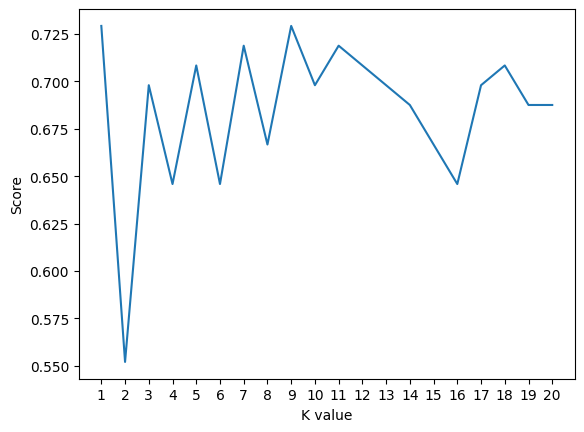

KNN best accuracy: 72.92%


In [34]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, Y_train)
    scoreListknn.append(KNclassifier.score(X_test, Y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

####Support Vector Machine (SVM)

In [35]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, Y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,Y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        30
           Y       0.69      1.00      0.81        66

    accuracy                           0.69        96
   macro avg       0.34      0.50      0.41        96
weighted avg       0.47      0.69      0.56        96

[[ 0 30]
 [ 0 66]]
SVC accuracy: 68.75%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0

####Naive Bayes

#####Categorical Naive Bayes



In [36]:

NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, Y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,Y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           N       0.79      0.50      0.61        30
           Y       0.81      0.94      0.87        66

    accuracy                           0.80        96
   macro avg       0.80      0.72      0.74        96
weighted avg       0.80      0.80      0.79        96

[[15 15]
 [ 4 62]]
Categorical Naive Bayes accuracy: 80.21%


#####Gaussian Naive Bayes

In [37]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, Y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,Y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           N       0.77      0.57      0.65        30
           Y       0.82      0.92      0.87        66

    accuracy                           0.81        96
   macro avg       0.80      0.75      0.76        96
weighted avg       0.81      0.81      0.80        96

[[17 13]
 [ 5 61]]
Gaussian Naive Bayes accuracy: 81.25%


####Decision Tree

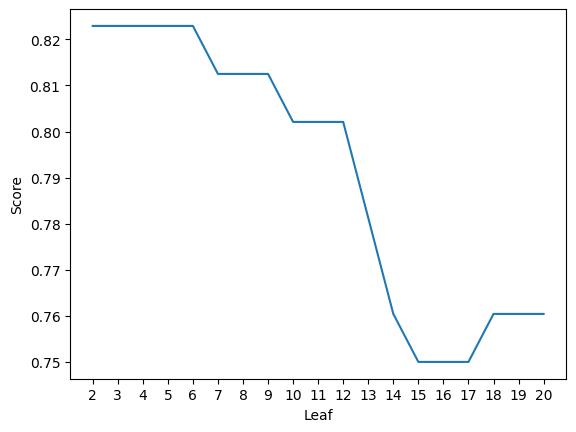

Decision Tree Accuracy: 82.29%


In [38]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, Y_train)
    scoreListDT.append(DTclassifier.score(X_test, Y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

####Random Forest

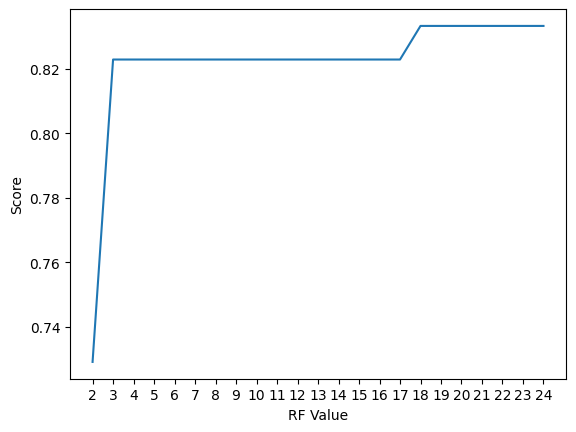

Random Forest Accuracy:  83.33%


In [39]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, Y_train)
    scoreListRF.append(RFclassifier.score(X_test, Y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

####Gradient Boosting

In [40]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [41]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, Y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [42]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=1, max_leaf_nodes=30, n_estimators=400,
                           subsample=0.5)
0.7998684210526315
{'subsample': 0.5, 'n_estimators': 400, 'max_leaf_nodes': 30, 'max_depth': 1}
4


In [43]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, Y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,Y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           N       0.65      0.67      0.66        30
           Y       0.85      0.83      0.84        66

    accuracy                           0.78        96
   macro avg       0.75      0.75      0.75        96
weighted avg       0.78      0.78      0.78        96

[[20 10]
 [11 55]]
Gradient Boosting accuracy: 78.12%


####Model Comparison

In [44]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',
                                  'SVM', 'Categorical NB',
                                  'Gaussian NB', 'Decision Tree',
                                  'Random Forest', 'Gradient Boost'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100,
                                     NBAcc1*100, NBAcc2*100, DTAcc*100,
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
6,Random Forest,83.333333
5,Decision Tree,82.291667
4,Gaussian NB,81.250000
3,Categorical NB,80.208333
7,Gradient Boost,78.125000
1,K Neighbors,72.916667
0,Logistic Regression,68.750000
2,SVM,68.750000


## Develop a Predictive System

In [45]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    #Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area

    input_data = (1,1,0,0,0,17,2840,114,360,0,0)

    # changing the input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the np array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = RFclassifier.predict(input_data_reshaped)
    # print(prediction)

    if (prediction[0]=='Y'):
      print('You can get a loan')
    else:
      print('You are not eligible to get a loan')


You are not eligible to get a loan


## Saving the Trained module

In [46]:
import pickle

In [47]:
filename = 'trained_model.sav'
pickle.dump(RFclassifier,open(filename,'wb'))

In [48]:
#Loading the saved module
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [49]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    #Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area

    input_data = (1,1,0,0,0,17,2840,114,360,0,0)

    # changing the input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the np array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = loaded_model.predict(input_data_reshaped)
    # print(prediction)

    if (prediction[0]=='Y'):
      print('You can get a loan')
    else:
      print('You are not eligible to get a loan')


You are not eligible to get a loan
